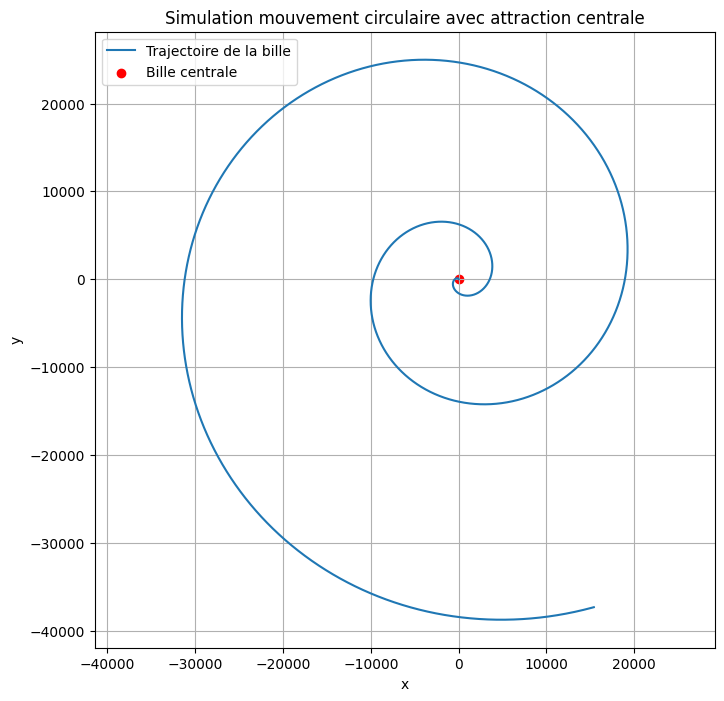

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
G = 1          # Constante d'attraction (arbitraire)
M = 1.0           # Masse équivalente de la bille centrale
m = 0.2           # Masse de la bille lancée
r0 = 5.0          # Distance initiale au centre
theta0 = np.pi/2     # Angle initial (rad)
omega0 = 0.9 * np.sqrt(G * M / r0**3)      # Vitesse angulaire initiale (rad/s)
alpha = 0.0       # Accélération angulaire (rad/s²), ici nulle pour simplifier
radial_speed = 2.0 # Accélération radiale initiale (m/s)

# Paramètres de simulation
dt = 0.01         # Pas de temps (s)
T = 200.0          # Durée totale (s)
n = int(T / dt)   # Nombre d'itérations

# Initialisation des vecteurs
r = np.zeros(n)
theta = np.zeros(n)
omega = np.zeros(n)
r[0] = r0
theta[0] = theta0
omega[0] = omega0

for i in range(1, n):
    # Calcul de l'accélération radiale due à la force attractive
    a_attract = - G * M / r[i-1]**2
    
    # Accélération centripète (associée à la composante normale du mouvement circu.)
    a_centrip = 2.0
    
    # Par conservation, l'accélération radiale totale provoque une variation de r
    # Ici on approxime la variation radiale comme une dérivée seconde : a_radiale = d²r/dt²
    # Ici on intègre numériquement avec une méthode simple d'Euler pour r''
    # La composante radiale nette est a_radiale = a_attract - a_centrip
    a_radiale = a_attract + a_centrip
    
    # Approximation intégrée des vitesses et positions radiales
    # On doit aussi calculer la vitesse radiale (non initialisée à zéro)
    if i == 1:
        vr = radial_speed  # vitesse radiale initiale supposée nulle
    else:
        vr = (r[i-1] - r[i-2]) / dt
        
    vr_new = vr + a_radiale * dt
    r[i] = r[i-1] + vr_new * dt
    
    # Mise à jour de omega (vitesse angulaire) avec acceleration angulaire alpha (0 ici)
    omega[i] = omega[i-1] + alpha * dt
    
    # Mise à jour de la position angulaire theta
    theta[i] = theta[i-1] + omega[i] * dt

# Conversion en coordonnées cartésiennes pour visualisation
x = r * np.cos(theta)
y = r * np.sin(theta)
    
# Affichage de la trajectoire
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Trajectoire de la bille')
plt.scatter(0, 0, color='red', label='Bille centrale')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulation mouvement circulaire avec attraction centrale')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()